#### Ori Yampolski
<br>

### Final project in the class: Information-theoretic analysis of neural language models
#### Recihman University, Fall 2022-2023

# Text Summarization 
Text summarization is the process of condensing a text document or passage into a shorter, more condensed version. 

## Common Problems in Text Summarization 
1. Extractive vs abstractive summarization: Extractive summarization involves selecting the most important sentences or phrases from the original text, while abstractive summarization involves rephrasing or paraphrasing the original text.

2. Repetition and redundancy: A summary should not repeat information from the original text, but it can be difficult to avoid this in practice.

3. Maintaining meaning and context: A summary should accurately convey the meaning and context of the original text, but this can be difficult when condensing a text into a shorter form.

4. Handling ambiguity: The model should be able to understand the context of the text and make the right decision when there are multiple possible interpretations of the text.

5. Handling idiomatic expressions and cultural references: This can be difficult for models because they may not understand the cultural context of the text and idiomatic expressions.

6. Handling long documents: Summarizing long documents can be difficult because there is more information to condense, and it can be harder to identify the most important information.

# Why Text Summarization is Hard

Text summarization is difficult for several reasons:

1. Language is complex and nuanced: The meaning of a sentence or passage can depend on many factors, such as the context, tone, and idiomatic expressions used. This can make it difficult for a machine to understand the meaning of a text and generate an accurate summary.

2. Ambiguity and subjectivity: Texts can be ambiguous or subjective, and different people may interpret the same text differently. This can make it difficult for a machine to determine what information is most important and generate a summary that accurately captures the meaning of the text.

3. Maintaining meaning and context: A summary should accurately convey the meaning and context of the original text, but this can be difficult when condensing a text into a shorter form, as it might leads to lose important information from the original text.

4. Handling idiomatic expressions and cultural references: This can be difficult for models because they may not understand the cultural context of the text and idiomatic expressions.

5. Handling long documents: Summarizing long documents can be difficult because there is more information to condense, and it can be harder to identify the most important information.

6. Handling multiple languages: Text summarization models are trained on large datasets which may be in a specific language, which can make it difficult to summarize texts in other languages.

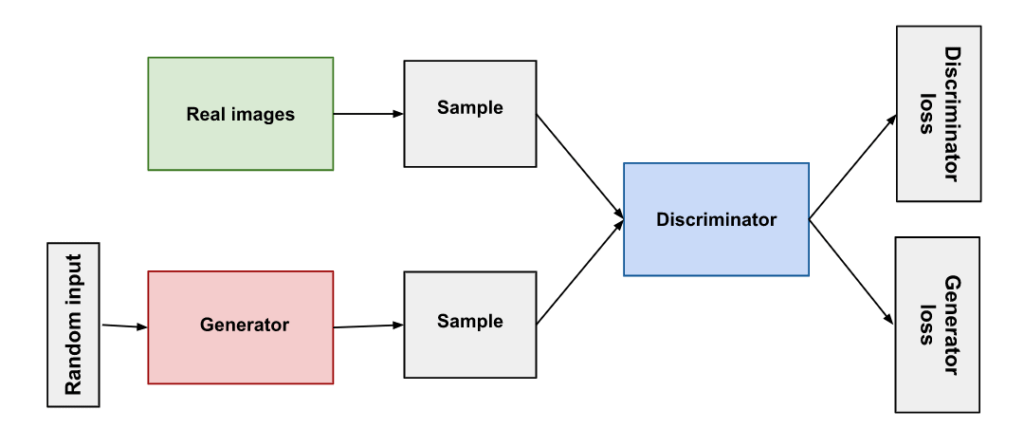

In [ ]:
from PIL import Image
import requests
from torchvision.io import read_image
import torchvision.transforms as transforms

url = "https://mlv4xkdrf2yq.i.optimole.com/cb:0l1_~a759/w:1024/h:447/q:mauto/https://datagen.tech/app/uploads/2022/06/image2-4.png"
image = Image.open(requests.get(url, stream=True).raw)

image

# Neural Network-based Text Summarization

A neural network-based model for text summarization typically uses a sequence-to-sequence architecture, which consists of two main components: an encoder and a decoder.

## Encoder
The encoder is a neural network that processes the input text, typically a sequence of words, and generates a fixed-length vector representation, called the context vector, that encodes the meaning and context of the input text. The encoder typically uses techniques such as word embeddings, recurrent neural networks (RNNs), or transformer networks to process the input text.

## Decoder
The decoder is a neural network that generates the summary text, typically a sequence of words, based on the context vector generated by the encoder. The decoder typically uses techniques such as RNNs or transformer networks, and it is trained to generate text that is similar to the input text but shorter and more condensed.

During the training phase, the neural network is trained on a large dataset of input-output pairs, where the input is a text document or passage, and the output is a summary of that text. The neural network learns to generate summaries that are similar to the ones in the training dataset.

During the inference phase, the neural network takes an input text and generates a summary. The neural network-based summarization models are trained on large datasets which may be in a specific language, which can make it difficult to summarize texts in other languages.

Note: The neural network-based models for text summarization have shown promising results in recent years, but they also have some limitations, such as the need for large amounts of training data and the potential for generating text that is not entirely coherent or grammatically correct.

# Data collection

In [ ]:
DATA_LOCATION = r"C:\Users\97254\Documents\Jupiter\Homework2023\Semester1\FinalTalk\raw.txt"
with open(DATA_LOCATION, "r", encoding="utf8") as f:
    summerized_data = f.readlines()

In [ ]:
for i in range(10):
    title, summery = summerized_data[i].split("|||")
    print(title, " -> ", summery)

Anarchism   ->   Anarchism is a political philosophy that advocates self-governed societies based on voluntary institutions. These are often described as stateless societies, although several authors have defined them more specifically as institutions based on non-hierarchical free associations. Anarchism holds the state to be undesirable, unnecessary and harmful. While anti-statism is central, anarchism specifically entails opposing authority or hierarchical organisation in the conduct of all human relations, including—but not limited to—the state system. Anarchism is usually considered an extreme left-wing ideology and much of anarchist economics and anarchist legal philosophy reflects anti-authoritarian interpretations of communism, collectivism, syndicalism, mutualism or participatory economics. Anarchism does not offer a fixed body of doctrine from a single particular world view, instead fluxing and flowing as a philosophy. Many types and traditions of anarchism exist, not all of 

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

URL_SITE_BASE = "https://en.wikipedia.org/wiki/"

def create_url_site(URL_BASED, title):
    
    title = title.strip()
    title_parts = title.split(" ")
    title = "_".join(title_parts)
    return URL_BASED + title
    

def get_text_from_url(url: str):
    
    html = urlopen(url).read().decode('utf-8')
    soup = BeautifulSoup(html, features="html.parser")

    # kill all script and style elements
    for script in soup(["script", "style"]):
        script.extract()    # rip it out

    # get text
    text = soup.get_text()

    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in text.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    text = '\n'.join(chunk for chunk in chunks if chunk)
    
    return text


In [ ]:
print(get_text_from_url(create_url_site(URL_SITE_BASE, title)))

Academy Award for Best Production Design - Wikipedia
Academy Award for Best Production Design
From Wikipedia, the free encyclopedia
Jump to navigation
Jump to search
Academy Award which recognizes achievement for art direction in film
Academy Award for Best Production DesignCountryUnited StatesPresented byAcademy of Motion Picture Arts and Sciences (AMPAS)First awarded1927Most recent winnerPatrice Vermette
Zsuzsanna Sipos Dune (2021)
The Academy Award for Best Production Design recognizes achievement for art direction in film. The category's original name was Best Art Direction, but was changed to its current name in 2012 for the 85th Academy Awards.[1] This change resulted from the Art Directors' branch of the Academy of Motion Picture Arts and Sciences (AMPAS) being renamed the Designers' branch. Since 1947, the award is shared with the set decorators. It is awarded to the best interior design in a film.[2]
The films below are listed with their production year (for example, the 2000 

# Encoder - Decoder With attention mechanisem

### Hyper Params

In [ ]:
size_of_input = 1024
size_of_dictionary = 40000
size_of_embedding = 100
number_of_heads = size_of_embedding // 4

In [ ]:
import nltk
#nltk.download()
from nltk.tokenize import sent_tokenize, word_tokenize, TreebankWordTokenizer, MWETokenizer, wordpunct_tokenize

def get_tokens_from_sentens(sentense):
    words = wordpunct_tokenize(sentense)
    print(words)
    return [ hash(word) % size_of_dictionary for word in words]
    
print(get_tokens_from_sentens("This is life!"))

['This', 'is', 'life', '!']
[28362, 6642, 18269, 33792]


In [ ]:

import torch
import torch.nn as nn

class EncoderManagers(nn.Module):
    
    def __init__(self, encoder_combine, encoder):
        super(EncoderManagers, self).__init__()
        
        self.encoder_combine = encoder_combine
        self.encoder = encoder
        
    def forward(self, arr):
        
        x = self.encoder(arr[0])
        for i in range(1,len(arr)):
            
            x = self.encoder_combine(x, arr[i])
        
        return x
            

class EncoderCombiner(nn.Module):
    
    def __init__(self, encoder):
        super(EncoderCombiner, self).__init__()
        
        self.max_pool = nn.MaxPool2d((2,1))
        self.encoder = encoder
        
        
    def forward(self,x1, x2):
        
        y1 = self.max_pool(x1)
        
        y2 = self.encoder(x2)
        y2 = self.max_pool(y2)
        
        return torch.cat((y1, y2), -2)
        

class Encoder(nn.Module):
    
    def __init__(self):
        super(Encoder, self).__init__()
        
        self.embedding = nn.Embedding(size_of_dictionary, size_of_embedding, max_norm=True)
        self.attention1 = nn.MultiheadAttention(size_of_embedding, number_of_heads)
        self.max_pool = nn.MaxPool2d((4,1))
        self.attention2 = nn.MultiheadAttention(size_of_embedding, number_of_heads)
        
    
    def forward(self, x):
        
        x = self.embedding(x)
        x, _ = self.attention1(x,x,x)
        x = self.max_pool(x)
        x, _ = self.attention2(x,x,x)
        
        return x

class Decoder(nn.Module):
    
    def __init__(self):
        super(Decoder, self).__init__()
        
        self.attention = nn.MultiheadAttention(size_of_embedding, number_of_heads)
        self.dense1 = nn.Linear(size_of_embedding, size_of_embedding // 2)
        self.dense2 = nn.Linear(size_of_embedding // 2, size_of_dictionary)
        
    def forward(self, x):
        
        x, _ = self.attention(x, x, x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = torch.nn.functional.softmax(x, dim=-1)
        
        return x
        

class EncoderDecoder(nn.Module):
    
    def __init__(self):
        super(EncoderDecoder, self).__init__()
        
        self.encoder = Encoder()
        self.encoder_combiner = EncoderCombiner(self.encoder)
        self.encoder_manager = EncoderManagers(self.encoder_combiner, self.encoder)
        
        self.decoder = Decoder()
        
    def forward(self, arr):
        
        x = self.encoder_manager(arr)
        x = self.decoder(x)
        
        return x
        

# Run experiments

In [ ]:
inp_tensor = torch.tensor([[ i for i in range(size_of_input)]])

encoder = Encoder()
res = encoder(inp_tensor)

print(res.shape)

torch.Size([1, 256, 100])


In [ ]:
inp_tensor1 = torch.tensor([[ i + 5 for i in range(size_of_input)]])
inp_tensor2 = torch.tensor([[ i for i in range(size_of_input)]])

inp_tensor1 = encoder(inp_tensor1)

encoder_combined = EncoderCombiner(encoder)
res = encoder_combined(inp_tensor1, inp_tensor2)

print(res.shape)

torch.Size([1, 256, 100])


In [ ]:
inp_tensor_arr = torch.tensor([[[ i for i in range(size_of_input)]] for _ in range(100)])

encoder_manager = EncoderManagers(encoder_combined, encoder)
res = encoder_manager(inp_tensor_arr)

print(res)
print(res.shape)

tensor([[[ 0.0393,  0.0124,  0.0458,  ...,  0.0323, -0.0047,  0.0001],
         [ 0.0393,  0.0124,  0.0458,  ...,  0.0323, -0.0047,  0.0001],
         [ 0.0362,  0.0124,  0.0458,  ...,  0.0323, -0.0047,  0.0001],
         ...,
         [ 0.0219, -0.0098,  0.0228,  ...,  0.0022, -0.0155, -0.0131],
         [ 0.0049, -0.0242,  0.0198,  ...,  0.0207, -0.0252, -0.0399],
         [ 0.0263, -0.0073,  0.0358,  ..., -0.0022, -0.0344, -0.0333]]],
       grad_fn=<CatBackward>)
torch.Size([1, 256, 100])


In [ ]:
decoder = Decoder()
_res = decoder(res)
print(_res)
print(_res.shape)

tensor([[[2.6311e-05, 2.5911e-05, 2.5247e-05,  ..., 2.3900e-05,
          2.2074e-05, 2.4202e-05],
         [2.6311e-05, 2.5911e-05, 2.5247e-05,  ..., 2.3900e-05,
          2.2074e-05, 2.4202e-05],
         [2.6357e-05, 2.5892e-05, 2.5244e-05,  ..., 2.3914e-05,
          2.2073e-05, 2.4188e-05],
         ...,
         [2.6445e-05, 2.5816e-05, 2.5290e-05,  ..., 2.4042e-05,
          2.2049e-05, 2.4138e-05],
         [2.6470e-05, 2.5803e-05, 2.5206e-05,  ..., 2.4039e-05,
          2.2105e-05, 2.4235e-05],
         [2.6430e-05, 2.5774e-05, 2.5230e-05,  ..., 2.4095e-05,
          2.2047e-05, 2.4154e-05]]], grad_fn=<SoftmaxBackward>)
torch.Size([1, 256, 40000])


In [ ]:
torch.sum(_res, 2)

tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0

# Run First Model

In [ ]:
import torch.optim as optim

encoder_decoder = EncoderDecoder()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(encoder_decoder.parameters(), lr=0.001)

In [ ]:

def add_word_to_dictionary(dic, word):
    
    if word not in dic:
                
        if len(dic) < size_of_dictionary - 2:
                dic[word] = len(dic)
        else:
            return size_of_dictionary - 2
    
    return dic[word]

def turn_data_to_tensor(data, max_length):
    
    X = []
    
    for i in range(0,len(data) - max_length, max_length):
        X.append(torch.tensor(data[i: i + max_length]))
        
    temp_arr = data[len(data) - max_length:]
    
    temp_arr = torch.tensor(temp_arr + [ size_of_dictionary - 1 for i in range(0, max_length - len(temp_arr))])
    
    X.append(temp_arr)
    
    return [ item.view(1, max_length) for item in X]

dictionary = {}

all_losses = []
for epoch in range(10):
    
    running_loss = 0.0
    temp_loss = 0.0
    
    for i in range(len(summerized_data)):
        
        title, summery = summerized_data[i].split("|||")
        summary_tokenize = wordpunct_tokenize(summery)
        try:
            long_data = get_text_from_url(create_url_site(URL_SITE_BASE, title))
        except:
            continue
        long_data_tokenize = wordpunct_tokenize(long_data)
        
        X = []
        
        for dat_tok in long_data_tokenize:
            
            index_of_word = add_word_to_dictionary(dictionary, dat_tok)
            X.append(index_of_word)
        
        Y = []
        
        for sum_tok in summary_tokenize:
            
            index_of_word = add_word_to_dictionary(dictionary, sum_tok)
            Y.append(index_of_word)
        
        X = turn_data_to_tensor(X, size_of_input)
        Y = turn_data_to_tensor(Y, size_of_input // 4)
        
        Y = Y[0].view(1, size_of_input // 4).long()
    
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = encoder_decoder(X)
        
        outputs = outputs.view(256, 40000)
        Y = Y.view(256)
        
        
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            temp_loss += running_loss
            running_loss = 0.0
    
    temp_loss += running_loss
    running_loss /= len(summerized_data)
    print("epoc", epoch, " loss", running_loss)
    
    all_losses.append(running_loss)
            

print("all_losses", all_losses)
print('Finished Training')

[1,  2000] loss: 9.913
[1,  4000] loss: 9.935
[1,  6000] loss: 9.712
epoc 0  loss 0.0
[2,  2000] loss: 9.906
[2,  4000] loss: 9.935
[2,  6000] loss: 9.712
epoc 1  loss 0.0
[3,  2000] loss: 9.906
[3,  4000] loss: 9.935
[3,  6000] loss: 9.712
epoc 2  loss 0.0
[4,  2000] loss: 9.906
[4,  4000] loss: 9.935
[4,  6000] loss: 9.712
epoc 3  loss 0.0
[5,  2000] loss: 9.906
[5,  4000] loss: 9.935
[5,  6000] loss: 9.712
epoc 4  loss 0.0
[6,  2000] loss: 9.906
[6,  4000] loss: 9.935
[6,  6000] loss: 9.712
epoc 5  loss 0.0
[7,  2000] loss: 9.906
[7,  4000] loss: 9.935
[7,  6000] loss: 9.712
epoc 6  loss 0.0
[8,  2000] loss: 9.906
[8,  4000] loss: 9.935
[8,  6000] loss: 9.712
epoc 7  loss 0.0
[9,  2000] loss: 9.906
[9,  4000] loss: 9.935
[9,  6000] loss: 9.712
epoc 8  loss 0.0
[10,  2000] loss: 9.906
[10,  4000] loss: 9.935
[10,  6000] loss: 9.712
epoc 9  loss 0.0
all_losses [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Finished Training


<All keys matched successfully>

In [ ]:
title, summery = summerized_data[0].split("|||")
summary_tokenize = wordpunct_tokenize(summery)
try:
    long_data = get_text_from_url(create_url_site(URL_SITE_BASE, title))
except:
    pass
long_data_tokenize = wordpunct_tokenize(long_data)

X = []

for dat_tok in long_data_tokenize:

    index_of_word = add_word_to_dictionary(dictionary, dat_tok)
    X.append(index_of_word)

X = turn_data_to_tensor(X, size_of_input)

Y = encoder_decoder(X)

print(title)
    

Anarchism 


In [ ]:
_Y = torch.argmax(Y, dim=-1)
_Y = _Y.tolist()[0]
dic_reverse = {val: key for key, val in dictionary.items()}
_Y = " ".join([dic_reverse[item] for item in _Y if item != size_of_dictionary - 1][:40])
print(_Y)

Anarchism is , a political philosophy are are self-governed societies are on are institutions . These are societies described as societies societies , although # defined have are them more specifically , as are based on hierarchical are associations . 


# Gaming - Gan

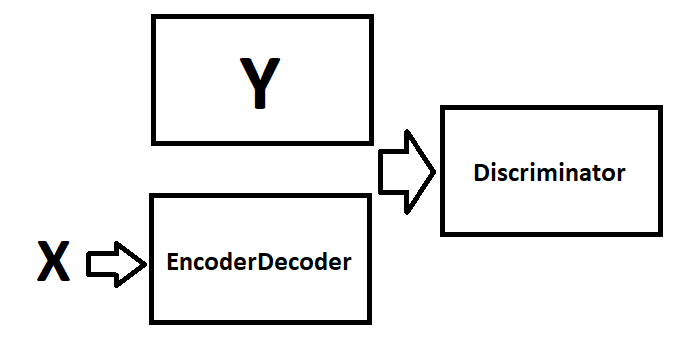

In [ ]:
from PIL import Image
import requests
from torchvision.io import read_image
import torchvision.transforms as transforms

image = Image.open("./MyGan.png")

image

In [ ]:


class Discriminator(nn.Module):
    
    def __init__(self):
        super(Discriminator, self).__init__()
        
        self.dense1 = nn.Linear(256, 1024)
        self.dense2 = nn.Linear(1024, 1024)
        self.dense3 = nn.Linear(1024, 256)
        self.dense4 = nn.Linear(256, 1)
        
    def forward(self, real):
        
        x = self.dense1(real)
        x = self.dense2(x)
        x = nn.ReLU()(x)
        x = self.dense3(x)
        x = self.dense4(x)
        x = nn.Sigmoid()(x)
        return x


In [ ]:
# y = torch.argmax(y, dim=-1)

generator = EncoderDecoder()
discriminator = Discriminator()


In [ ]:

generator_optimizer = torch.optim.Adam(generator.parameters(), lr=0.001)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.001)
loss = nn.BCELoss()

all_losses_gan = []

for j in range(10):
    
    losses = 0
    
    for i in range(len(summerized_data)):
        
        
        title, summery = summerized_data[i].split("|||")
        summary_tokenize = wordpunct_tokenize(summery)
        try:
            long_data = get_text_from_url(create_url_site(URL_SITE_BASE, title))
        except:
            continue
        long_data_tokenize = wordpunct_tokenize(long_data)
        
        X = []
        
        for dat_tok in long_data_tokenize:
            
            index_of_word = add_word_to_dictionary(dictionary, dat_tok)
            X.append(index_of_word)
        
        Y = []
        
        for sum_tok in summary_tokenize:
            
            index_of_word = add_word_to_dictionary(dictionary, sum_tok)
            Y.append(index_of_word)
        
        X = turn_data_to_tensor(X, size_of_input)
        Y = turn_data_to_tensor(Y, size_of_input // 4)
        
        Y = Y[0].view(1, size_of_input // 4).float()
        
        generator_optimizer.zero_grad()
        
        generated_data = generator(X)
        generated_data = torch.argmax(generated_data, dim=-1).float()
        
        discriminator_data = torch.tensor([[1]]).float()
        
        discriminator_out = discriminator(generated_data)
        
        generator_loss = loss(discriminator_out, discriminator_data)
        
        generator_loss.backward()
        generator_optimizer.step()
        
        discriminator_optimizer.zero_grad()
        
        true_discriminator_out = discriminator(Y)
        true_discriminator_loss = loss(true_discriminator_out ,discriminator_data)
        
        false_discrimination_out = discriminator(generated_data)
        false_discriminator_loss = loss(false_discrimination_out ,torch.tensor([[0]]).float())
        
        discrimination_loss = (true_discriminator_loss + false_discriminator_loss) / 2
        
        discrimination_loss.backward()
        discriminator_optimizer.step()
        
        losses += discrimination_loss.item()
        
        
        #if i % 60 == 59:
            
        #    print("losses ",i , losses / (i + 1))
            
        
    losses /= len(summerized_data)
    
    all_losses_gan.append(losses)
        


In [ ]:
print("all_losses", all_losses)
print('Finished Training')

all_losses [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Finished Training


In [ ]:
losses

48.7

In [ ]:
title, summery = summerized_data[0].split("|||")
summary_tokenize = wordpunct_tokenize(summery)
try:
    long_data = get_text_from_url(create_url_site(URL_SITE_BASE, title))
except:
    pass
long_data_tokenize = wordpunct_tokenize(long_data)

X = []

for dat_tok in long_data_tokenize:

    index_of_word = add_word_to_dictionary(dictionary, dat_tok)
    X.append(index_of_word)

X = turn_data_to_tensor(X, size_of_input)

Y = generator(X)

print(title)

Anarchism 


In [ ]:
_Y = torch.argmax(Y, dim=-1)
_Y = _Y.tolist()[0]
dic_reverse = {val: key for key, val in dictionary.items()}
_Y = " ".join([dic_reverse[item] for item in _Y if item != size_of_dictionary - 1][:40])
print(_Y)

Anarchism is a political philosophy that advocates self-governed societies based on voluntary institutions . These are often described as stateless societies , although several authors have defined them more specifically as institutions based on non-hierarchical free associations . Anarchism holds
